## Lab 7: Resampling and the Bootstrap

In today's lab, we'll continue our scenario from last week. Recall:

The British Royal Air Force wanted to know how many warplanes the Germans had (some number `N`, which is a *population parameter*), and they needed to estimate that quantity knowing only a random sample of the planes' serial numbers (from 1 to `N`). We know that the German's warplanes are labeled consecutively from 1 to `N`, so `N` would be the total number of warplanes they have. 

Last week, given *just* a random sample of serial numbers, we estimated `N`, and then used simulation to find out how accurate our estimate probably was, without ever looking at the whole population.  This was an example of *statistical inference*. We ended up calculating `max_estimate` and/or `mean_based_estimate` but had no idea how good of an estimate it was.

We can't just confidently proclaim that `max_estimate` or `mean_based_estimate` is equal to `N`.  What if we're really far off?  So we want to get a sense of the accuracy of our estimates. 

As usual, **run the cell below** to prepare the lab.

In [3]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Pandas modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Resampling

Let's begin by loading our data from the last lab and showing our histogram and mean and max estimates from the last time. Run the following cell to load the data, see the estimates and plot the histogram.

Mean-Based Estimate: 122.47058823529412 Max-Based Estimate: 135


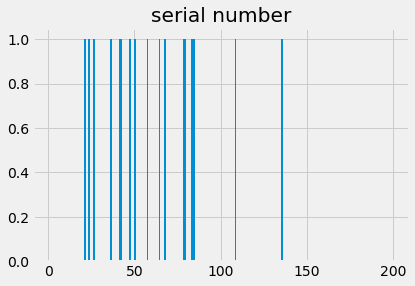

In [15]:
def plot_serial_numbers(numbers):
    numbers.hist(bins=np.arange(1,200))
    
def mean_based_estimator(numbers):
    return 2 * numbers['serial number'].mean()

def max_based_estimator(numbers):
    return numbers['serial number'].max()

observations = pd.read_csv("serial_numbers.csv")
num_observations = len(observations.index)

print("Mean-Based Estimate:", mean_based_estimator(observations), "Max-Based Estimate:" ,max_based_estimator(observations))
plot_serial_numbers(observations)

In today's lab, we'll use resampling with the RAF dataset to see if our accuracy is better.  That is, we won't exactly simulate the observations the RAF would have really seen.  Rather we sample from our current sample, or "resample."

Why does that make any sense?

When we tried to estimate `N`, we would have liked to use the whole population.  Since we had only a sample, we used that to estimate `N` instead.

This time, we would like to use the population of serial numbers to *run a simulation* about estimates of `N`.  But we still only have our sample.  We use our sample in place of the population to run the simulation.

So there is a simple analogy between estimating `N` and simulating the variability of estimates.

$$\text{computing }N\text{ from the population}$$
$$:$$
$$\text{computing an estimate of }N\text{ from a sample}$$

$$\text{as}$$

$$\text{simulating the distribution of estimates of }N\text{ using samples from the population}$$
$$:$$
$$\text{simulating an (approximate) distribution of estimates of }N\text{ using resamples from a sample}$$

#### Question 1.1
Write a function called `simulate_resample`.  It should generate a resample from the observed serial numbers in `observations` and return that resample.  (The resample should be a table like `observations`.)  It should take no arguments.

In [60]:
def simulate_resample():
    ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def simulate_resample():
    return observations.sample(num_observations, replace=True)</pre>
</details>

Let's make one resample.

In [ ]:
one_resample = simulate_resample()
one_resample

Later, we'll use many resamples at once to see what estimates typically look like.  We don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's examine some individual resamples before we start using them.

#### Question 1.2
Make a histogram of your resample using the plotting function `plot_serial_numbers` provided above, **and** a separate histogram of the original observations.

In [ ]:
...
...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
plot_serial_numbers(observations)
plot_serial_numbers(simulate_resample())
</pre>
</details>

#### Question 1.3
Which of the following are true:
1. In the plot of the resample, there are no bars at locations that weren't there in the plot of the original observations.
2. In the plot of the original observations, there are no bars at locations that weren't there in the plot of the resample.
3. The resample has exactly one copy of each serial number.
4. The sample has exactly one copy of each serial number.

Assign true_statements to a list of the correct statements.

In [ ]:
true_statements = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
1 and 4 are the true statements. 
</details>

#### Question 2.4
Create two more resamples using the function `simulate_resample` from above. For each resampled data, plot it and compute its max- and mean-based estimates.

In [ ]:
resample_0 = ...
...

mean_based_estimate_0 = ...
max_based_estimate_0 = ...

print("Mean-based estimate for resample 0:", mean_based_estimate_0)
print("Max-based estimate for resample 0:", max_based_estimate_0)

resample_1 = ...
...

mean_based_estimate_1 = ...
max_based_estimate_1 = ...
print("Mean-based estimate for resample 1:", mean_based_estimate_1)
print("Max-based estimate for resample 1:", max_based_estimate_1)

You may find that the max-based estimates from the resamples are both exactly 135 more often than not.  You will probably find that the two mean-based estimates do differ from the sample mean-based estimate (and from each other).

#### Question 1.5
Using probability that you've learned, compute the exact chance that a max-based estimate from *one* resample is 135.

Using your intuition, explain why a mean-based estimate from a resample is less often exactly equal to the mean-based estimate from the original sample as compared to a max-based estimate.

As a refresher, here are some rules of probability that may be helpful:

- When all outcomes are equally likely: P(event happens) $=$ $\frac{\text{# outcomes that make event happen}}{\text{# of all outcomes}}$

- When an event can happen in 2 ways: P(event) $=$ P(event happening first way) $+$ P(event happening second way)

- When 2 events must both happen: P(2 events both happen) $=$ P(one event happens) $*$ P(other event happens, given the first one happened)

- When an event doesn't happen: P(event doesn't happen) $=$ 1 $-$ P(event does happen)

- P(at least one success) $= 1 - $ P(no successes)

*Write your answer here, replacing this text.*

## 2. Simulating with resampling
Since resampling from a sample looks just like sampling from a population, the code should look almost the same.  That means we can write a function that simulates the process of either sampling from a population or resampling from a sample.  If we pass in population as its argument, it will do the former; if we pass in a sample, it will do the latter.

#### Question 2.1
Write a function called `simulate_estimates`.  It should take 4 arguments:
1. A table from which the data should be sampled.  The table will have 1 column named `"serial number"`.
2. The size of each sample from that table, an integer.  (For example, to do resampling, we would pass for this argument the number of rows in the table.)
3. A function that computes a statistic of a sample.  This argument is a *function* that takes an array of serial numbers as its argument and returns a number.
4. The number of replications to perform.

It should simulate many samples with replacement from the given table.  (The number of samples is the 4th argument.)  For each of those samples, it should compute the statistic on that sample. Then it should return an array containing each of those statistics.  The code below provides an example use of your function and describes how you can verify that you've written it correctly.

In [ ]:
def simulate_estimates(original_table, sample_size, statistic, num_replications):
    # Our implementation of this function took 5 short lines of code.
    ...

# This should generate an empirical histogram of twice-mean estimates
# of N from samples of size 50 if N is 1000.  This should be a bell-shaped
# curve centered at 1000 with most of its mass in [800, 1200].  To verify your
# answer, make sure that's what you see!
example_estimates = simulate_estimates(
    pd.DataFrame({"serial number": np.arange(1, 1000+1)}),
    50,
    mean_based_estimator,
    10000)
pd.DataFrame({"mean-based estimate": example_estimates}).hist(bins=np.arange(0, 1500, 25))

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def simulate_estimates(original_table, sample_size, statistic, num_replications):
    estimates = []
    for i in range(num_replications):
        sample = original_table.sample(sample_size, replace=True)
        sample_stat = statistic(sample)
        estimates = np.append(estimates, sample_stat)
    return estimates
</pre>
</details>

Now we can go back to the sample we actually observed (the table `observations`) and estimate how much our mean-based estimate of `N` would have varied from sample to sample.

#### Question 2.2
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *mean-based estimates* of `N`.  Use 5,000 replications.  
We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

In [ ]:
bootstrap_estimates = ...

pd.DataFrame({"mean-based estimate" : bootstrap_estimates}).hist(bins=np.arange(0, 200, 4)) 

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
bootstrap_estimates = simulate_estimates(observations, num_observations, mean_based_estimator, 5000)
</pre>
</details>

#### Question 2.3
Compute an interval that covers the middle 95% of the bootstrap estimates.  Verify that your interval looks like it covers 95% of the area in the histogram above.

Hints: you can use `np.quantile(bootstrap_results, percentage)`.

We ignore 2.5% on each tail. [(1-0.95)/2, 1-(1-0.95)/2]

In [ ]:
left_end = ...
right_end = ...
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(left_end, right_end))

#### Question 2.4
Your mean-based estimate of `N` should have been around 122. Given the above calculations, is it likely that `N` is exactly 122? If not, what is the typical range of values of the mean-based estimates of `N` for samples of size 17?

*Write your answer here, replacing this text.*

#### Question 2.5
`N` was actually 150!  Write code that simulates the sampling and bootstrapping process again, as follows:

1. Generate a new set of random observations the RAF might have seen by sampling from the population table we have created for you below. 
2. Compute an estimate of `N` from these new observations, using `mean_based_estimator`.
3. Using only the new observations, compute 5,000 bootstrap estimates of `N`.
4. Plot these bootstrap estimates and compute an interval covering the middle 95%.

In [ ]:
population = pd.DataFrame({"serial number": np.arange(1, 150+1)})

new_observations = ...
new_mean_based_estimate = ...
new_bootstrap_estimates = ...
...
new_left_end = ...
new_right_end = ...


print("New mean-based estimate: {:f}".format(new_mean_based_estimate))
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(new_left_end, new_right_end))

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
new_observations = population.sample(num_observations)
new_mean_based_estimate = mean_based_estimator(new_observations)
new_bootstrap_estimates = simulate_estimates(new_observations, num_observations, mean_based_estimator, 5000)
pd.DataFrame({"mean-based estimate" : new_bootstrap_estimates}).hist(bins=np.arange(0, 200, 4)) 
</pre>
</details>

#### Question 2.6
Does the interval covering the middle 95% of the new bootstrap estimates include `N`?  If you ran that cell many times, what is the probability that it will include `N`?

*Write your answer here, replacing this text.*

Great job! :D You're finished with lab 7!

**Acknowledgement**: The materials for this lab, and course textbook are based on the [data8](http://data8.org/) course at UC Berkeley.